Metric 2: Number of Park Facility Features [Michael Puthumana]
The goal behind using this metric was to see the amount of options available within neighborhoods for recreation

About the dataet s: etI used one data set containing all the features of park facility features. Each feature is separated based on type of feature and park center. Due to a lack of zipcodes or addresses in the data set, I have to extract all the unique center names from the data set and map them to their respective neighborhod.

ParFeature Data Set LinknkLihttps://data.wprdc.org/dataset/allegheny-county-park-features/resource/9bd66142-ffbe-4342-9ed8-d2a11dcce60f

Park Center Neighborhood Locations were identified by Google searches

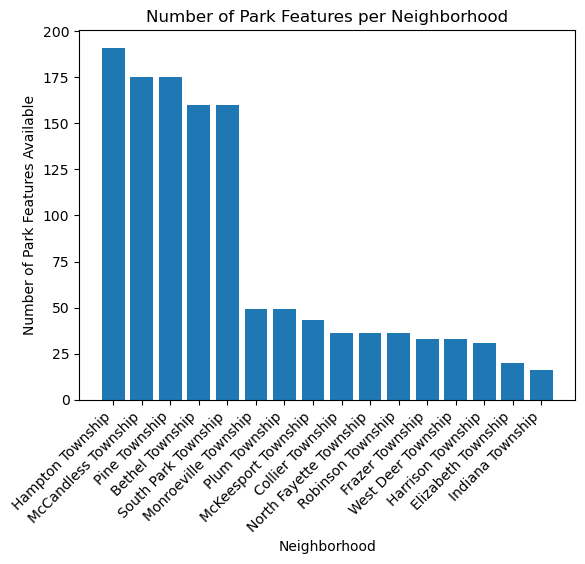

                        Number of Park Features per Neighborhood
neighborhood                                                    
Hampton Township                                             191
McCandless Township                                          175
Pine Township                                                175
Bethel Township                                              160
South Park Township                                          160
Monroeville Township                                          49
Plum Township                                                 49
McKeesport Township                                           43
Collier Township                                              36
North Fayette Township                                        36
Robinson Township                                             36
Frazer Township                                               33
West Deer Township                                            33
Harrison Township        

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("parkFeatureData.csv")

# Extract all park names
unique_centers = df['center'].unique()
unique_centers_list = unique_centers.tolist()
#print("Unique center names:", unique_centers_list)

#swap centers to neighborhood for graphing
center_to_neighborhood = {
    'Boyce Park': ['Monroeville Township','Plum Township'],
    'Hartwood Acres Park': ['Hampton Township','Indiana Township'],
    'Harrison Hills Park': 'Harrison Township',
    'North Park': ['Hampton Township','McCandless Township','Pine Township'],
    'Round Hill Park': 'Elizabeth Township',
    "Settler's Cabin Park":['Collier Township','North Fayette Township','Robinson Township'],
    'South Park':['Bethel Township','South Park Township'],
    'White Oak Park':'McKeesport Township',
    'Deer Lakes Park':['Frazer Township','West Deer Township']
}

#create dataframe for counts
df['neighborhood'] = df['center'].map(center_to_neighborhood)

#separate lists into individual neighborhoods rather than a grouped list
df = df.explode('neighborhood')

#count instances of each neighborhood
count = df['neighborhood'].value_counts()

#create bar plot
plt.bar(count.index, count.values)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Park Features Available')
plt.title('Number of Park Features per Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.show()

#display table
neighborhood_counts_df = pd.DataFrame(count)
neighborhood_counts_df.columns = ['Number of Park Features per Neighborhood']
print(neighborhood_counts_df)